In [247]:
def getDistance(lat_a, lng_a, lat_b, lng_b):
    Earth_Radius = 6373.0
    
    lat1 = np.radians(lat_a)
    lon1 = np.radians(lng_a)
    lat2 = np.radians(lat_b)
    lon2 = np.radians(lng_b)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.tanh(np.sqrt(a)/np.sqrt(1 - a))
    distance = Earth_Radius * c
    return distance

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [249]:
df=pd.read_csv('order_items.csv')

In [250]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15-08-2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13-02-2017 13:57,199.90,18.14


In [251]:
df6=pd.read_csv('geolocation.csv')

In [252]:
df6.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [253]:
df_cust=df6.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat' : 'mean', 'geolocation_lng' : 'mean'}).reset_index()

In [254]:
df_seller=df6.groupby('geolocation_city').agg({'geolocation_lat' : 'mean', 'geolocation_lng' : 'mean'}).reset_index()

In [255]:
df1=pd.read_csv('customers.csv')

In [256]:
df.shape

(112650, 7)

In [257]:
df.order_id.nunique()

98666

In [258]:
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [259]:
df1.customer_id.nunique()

99441

In [260]:
df1=pd.merge( df1 ,df_cust , left_on='customer_zip_code_prefix' , right_on='geolocation_zip_code_prefix' , how='left')

In [261]:
df1=df1.drop('geolocation_zip_code_prefix',1)

In [262]:
df2=pd.read_csv('sellers_dataset.csv')

In [263]:
df2.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [264]:
df2=pd.merge( df2 ,df_seller , left_on='seller_city' , right_on='geolocation_city' , how='left')

In [265]:
df2=df2.drop('geolocation_city',1)

In [266]:
df3=pd.read_csv('products_dataset.csv')

In [267]:
df3.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [268]:
name=pd.read_csv('product_category_name_translation.csv')

In [269]:
name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [270]:
df3=pd.merge(df3,name,on=['product_category_name'])

In [271]:
df3 =df3.drop('product_category_name',1)

In [272]:
df3.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [273]:
df4=pd.read_csv('order_payments.csv')

In [274]:
df4.head()

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45


In [275]:
df4.shape

(103886, 4)

In [276]:
df4.order_id.nunique()

99440

In [277]:
df5=pd.read_csv('orders_dataset.csv')

In [278]:
df5.head()

,order_id,customer_id,order_status,PurchaseDate,ApprovalDate,DeliveredDate,EstimatedDate,Timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02-10-2017 10:56,02-10-2017 11:07,10-10-2017 21:25,18-10-2017 00:00,02-10-2017 10:56
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24-07-2018 20:41,26-07-2018 03:24,07-08-2018 15:27,13-08-2018 00:00,24-07-2018 20:41
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08-08-2018 08:38,08-08-2018 08:55,17-08-2018 18:06,04-09-2018 00:00,08-08-2018 08:38
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18-11-2017 19:28,18-11-2017 19:45,02-12-2017 00:28,15-12-2017 00:00,18-11-2017 19:28
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,13-02-2018 21:18,13-02-2018 22:20,16-02-2018 18:17,26-02-2018 00:00,13-02-2018 21:18


In [279]:
df5['PurchaseDate']=pd.to_datetime(df5['PurchaseDate'] , format='%d-%m-%Y %H:%M')
df5['ApprovalDate']=pd.to_datetime(df5['ApprovalDate'] , format='%d-%m-%Y %H:%M')
df5['DeliveredDate']=pd.to_datetime(df5['DeliveredDate'] , format='%d-%m-%Y %H:%M')
df5['EstimatedDate']=pd.to_datetime(df5['EstimatedDate'] , format='%d-%m-%Y %H:%M')

In [280]:
df5['responsetime'] = (df5['ApprovalDate'] - df5['PurchaseDate']).dt.days

In [281]:
df5['Deliveredtime'] = (df5['DeliveredDate'] - df5['PurchaseDate']).dt.days

In [282]:
df5['Estimatedtime'] = (df5['EstimatedDate'] - df5['PurchaseDate']).dt.days

In [283]:
df5.shape

(99441, 11)

In [284]:
df5.head()

,order_id,customer_id,order_status,PurchaseDate,ApprovalDate,DeliveredDate,EstimatedDate,Timestamp,responsetime,Deliveredtime,Estimatedtime
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,02-10-2017 10:56,0.0,8.0,15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-08-07 15:27:00,2018-08-13,24-07-2018 20:41,1.0,13.0,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-17 18:06:00,2018-09-04,08-08-2018 08:38,0.0,9.0,26
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-12-02 00:28:00,2017-12-15,18-11-2017 19:28,0.0,13.0,26
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-16 18:17:00,2018-02-26,13-02-2018 21:18,0.0,2.0,12


In [285]:
df5.order_id.nunique()

99441

In [286]:
df5.customer_id.nunique()

99441

In [287]:
df5=df5[~df5['Deliveredtime'].isna()]

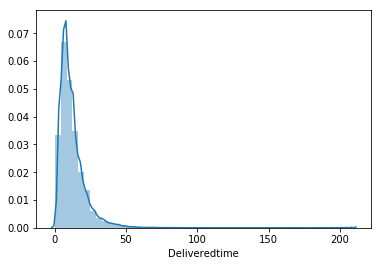

In [288]:
sns.distplot(df5.Deliveredtime)

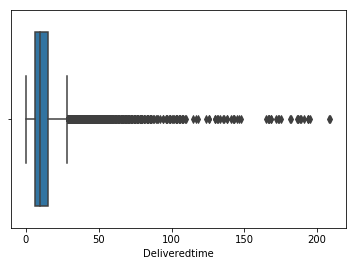

In [289]:
sns.boxplot(df5.Deliveredtime)

In [290]:
df5=df5[df5['Deliveredtime']<150]

In [291]:
df5['logDeliveredtime'] = np.log(df5['Deliveredtime']+1)

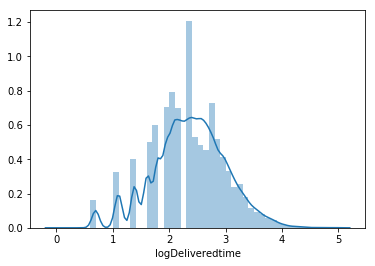

In [292]:
sns.distplot(df5['logDeliveredtime'] )

In [293]:
df5=pd.merge(df5, df, on=['order_id'],how='left') 

In [294]:
df5.shape

(110169, 18)

In [295]:
df5.head()

,order_id,customer_id,order_status,PurchaseDate,ApprovalDate,DeliveredDate,EstimatedDate,Timestamp,responsetime,Deliveredtime,Estimatedtime,logDeliveredtime,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,02-10-2017 10:56,0.0,8.0,15,2.197225,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,06-10-2017 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-08-07 15:27:00,2018-08-13,24-07-2018 20:41,1.0,13.0,19,2.639057,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,30-07-2018 03:24,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-17 18:06:00,2018-09-04,08-08-2018 08:38,0.0,9.0,26,2.302585,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,13-08-2018 08:55,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-12-02 00:28:00,2017-12-15,18-11-2017 19:28,0.0,13.0,26,2.639057,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,23-11-2017 19:45,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-16 18:17:00,2018-02-26,13-02-2018 21:18,0.0,2.0,12,1.098612,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19-02-2018 20:31,19.90,8.72


In [296]:
df5.customer_id.nunique()

96452

In [297]:
df5=pd.merge(df5,df1,on=['customer_id'],how='left')

In [298]:
df5=pd.merge(df5,df2,on=['seller_id'],how='left')

In [299]:
df5=pd.merge(df5,df3,on=['product_id'],how='left')

In [300]:
df5.shape

(110169, 37)

In [301]:
df00=df5.drop(['order_id','customer_id','Timestamp','PurchaseDate',
         'ApprovalDate','DeliveredDate','EstimatedDate','order_item_id','product_id','seller_id',
         'shipping_limit_date','customer_unique_id'],1)

In [302]:
df00.head()

,order_status,responsetime,Deliveredtime,Estimatedtime,logDeliveredtime,price,freight_value,customer_zip_code_prefix,customer_city,customer_state,...,geolocation_lat_y,geolocation_lng_y,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,delivered,0.0,8.0,15,2.197225,29.99,8.72,3149,sao paulo,SP,...,-23.669994,-46.448909,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,delivered,1.0,13.0,19,2.639057,118.70,22.76,47813,barreiras,BA,...,-19.908772,-43.957549,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,delivered,0.0,9.0,26,2.302585,159.90,19.22,75265,vianopolis,GO,...,-21.363502,-48.229601,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,delivered,0.0,13.0,26,2.639057,45.00,27.20,59296,sao goncalo do amarante,RN,...,-19.908772,-43.957549,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,delivered,0.0,2.0,12,1.098612,19.90,8.72,9195,santo andre,SP,...,-23.530402,-46.193888,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [304]:
df00['geolocation_lat_y']=df00['geolocation_lat_y'].fillna(df00['geolocation_lat_y'].median())                
df00['geolocation_lng_y']=df00['geolocation_lng_y'].fillna(df00['geolocation_lng_y'].median())                
                        
df00['product_weight_g']=df00['product_weight_g'].fillna(df00['product_weight_g'].median())                 
df00['product_length_cm']=df00['product_length_cm'].fillna(df00['product_length_cm'].median())                
df00['product_height_cm']=df00['product_height_cm'].fillna(df00['product_height_cm'].median())                
df00['product_width_cm']=df00['product_width_cm'].fillna(df00['product_width_cm'].median())     


df00['geolocation_lat_x']=df00['geolocation_lat_x'].fillna(df00['geolocation_lat_x'].median())                
df00['geolocation_lng_x']=df00['geolocation_lng_x'].fillna(df00['geolocation_lng_x'].median())                
df00['responsetime']=df00['responsetime'].fillna(df00['responsetime'].median())                     

In [308]:
df_prod=df00.groupby('product_category_name_english').agg({'Deliveredtime' : ['mean','max','min']}).reset_index()

In [310]:
df_prod.columns = ["_".join(x) for x in df_prod.columns.ravel()]

In [313]:
df00=pd.merge(df00,df_prod,left_on=['product_category_name_english'], right_on=['product_category_name_english_'],how='left')

In [221]:
df__cust=df00.groupby('customer_zip_code_prefix').agg({'Deliveredtime' : ['mean','max','min']}).reset_index()

In [314]:
df__cust.columns = ["_".join(x) for x in df__cust.columns.ravel()]

In [315]:
df00=pd.merge(df00,df__cust,left_on=['customer_zip_code_prefix'],right_on=['customer_zip_code_prefix_'],how='left')

In [317]:
df__sell=df00.groupby('seller_zip_code_prefix').agg({'Deliveredtime' : ['mean','max','min']}).reset_index()

In [320]:
df__sell.columns = ["_".join(x) for x in df__sell.columns.ravel()]

In [322]:
df00=pd.merge(df00,df__sell,left_on=['seller_zip_code_prefix'], right_on=['seller_zip_code_prefix_'],how='left')

In [323]:
df00['Samecity'] = np.where(df00.customer_city==df00.seller_city,1,0)

In [324]:
df00['Samestate'] = np.where(df00.customer_state==df00.seller_state,1,0)

In [325]:
df00.head()

,order_status,responsetime,Deliveredtime,Estimatedtime,logDeliveredtime,price,freight_value,customer_zip_code_prefix,customer_city,customer_state,...,customer_zip_code_prefix_,Deliveredtime_mean_y,Deliveredtime_max_y,Deliveredtime_min_y,seller_zip_code_prefix_,Deliveredtime_mean,Deliveredtime_max,Deliveredtime_min,Samecity,Samestate
0,delivered,0.0,8.0,15,2.197225,29.99,8.72,3149,sao paulo,SP,...,3149,3.25,8.0,1.0,9350,8.423792,35.0,1.0,0,1
1,delivered,1.0,13.0,19,2.639057,118.70,22.76,47813,barreiras,BA,...,47813,17.00,18.0,13.0,31570,6.192000,27.0,1.0,0,0
2,delivered,0.0,9.0,26,2.302585,159.90,19.22,75265,vianopolis,GO,...,75265,11.75,13.0,9.0,14840,14.549652,55.0,2.0,0,0
3,delivered,0.0,13.0,26,2.639057,45.00,27.20,59296,sao goncalo do amarante,RN,...,59296,19.00,33.0,12.0,31842,10.961290,52.0,2.0,0,0
4,delivered,0.0,2.0,12,1.098612,19.90,8.72,9195,santo andre,SP,...,9195,6.92,22.0,1.0,8752,13.361582,70.0,1.0,0,1


In [326]:
df00['Distance']= getDistance(df00['geolocation_lat_x'],df00['geolocation_lng_x'],df00['geolocation_lat_y'],df00['geolocation_lat_y'])

In [343]:
df01=df00.drop(['order_status','customer_zip_code_prefix','product_category_name_english','customer_city','seller_city',
          'customer_state','seller_state','product_name_lenght','product_description_lenght',
           'product_photos_qty','seller_zip_code_prefix','Deliveredtime','product_category_name_english_',
               'customer_zip_code_prefix_','seller_zip_code_prefix_'],1)

In [356]:
df01.corr().reset_index().to_csv('corr.csv')

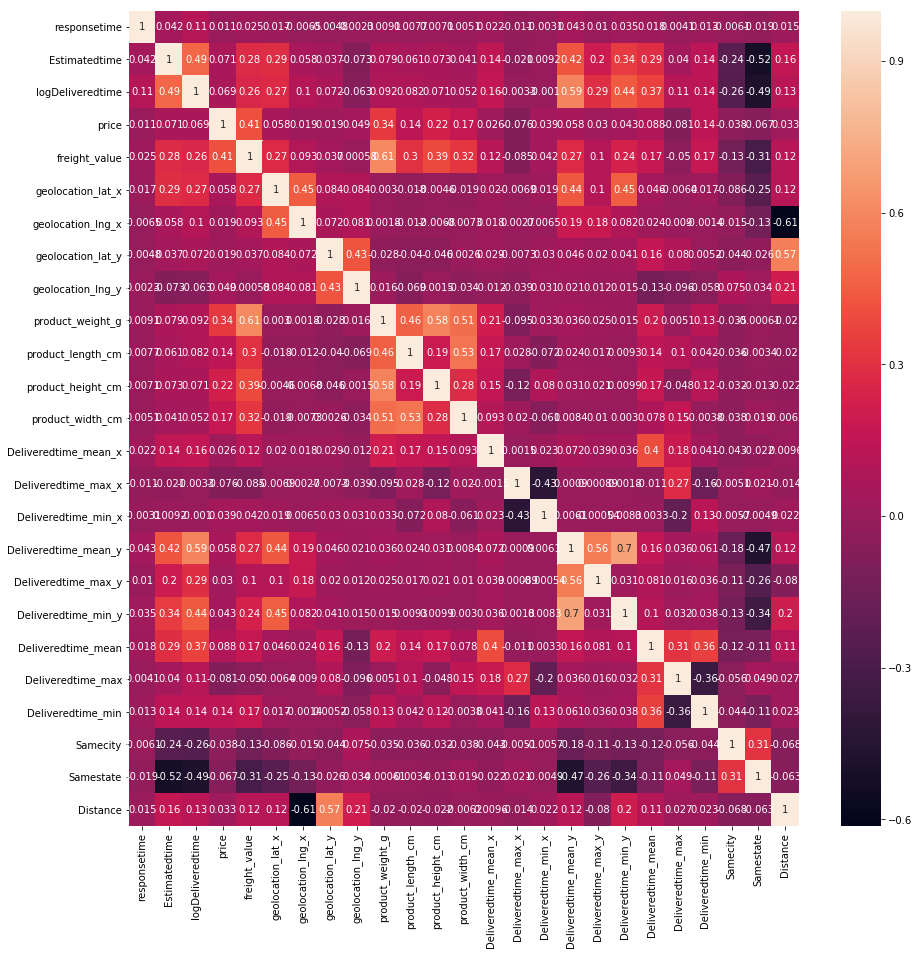

In [353]:
plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(df01.corr(),annot=True)

In [344]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y= train_test_split(df01.drop('logDeliveredtime',1), df01['logDeliveredtime'], test_size=0.30, random_state=123)

In [345]:
import xgboost as xgb

In [346]:
feature=df01.drop('logDeliveredtime',1).columns.tolist()

In [347]:
feature

['responsetime',
 'Estimatedtime',
 'price',
 'freight_value',
 'geolocation_lat_x',
 'geolocation_lng_x',
 'geolocation_lat_y',
 'geolocation_lng_y',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'Deliveredtime_mean_x',
 'Deliveredtime_max_x',
 'Deliveredtime_min_x',
 'Deliveredtime_mean_y',
 'Deliveredtime_max_y',
 'Deliveredtime_min_y',
 'Deliveredtime_mean',
 'Deliveredtime_max',
 'Deliveredtime_min',
 'Samecity',
 'Samestate',
 'Distance']

In [348]:
import gc
gc.collect()

144

In [374]:
param = {'objective' : 'reg:linear',
            'eta' : 0.1,
            'max_depth' : 10,
            'silent' : 1,
            'eval_metric' : "rmse",
            'min_child_weight' : 1,
            'nthread' : 16,
            'subsample' : 0.8,
            'colsample_bytree' : 0.8,
            'seed' : 1}

para = list(param.items())

xgtrain = xgb.DMatrix(train_x, train_y, feature_names=feature)
xgval = xgb.DMatrix(val_x, val_y, feature_names=feature)
    
watchlist = [ (xgtrain,'train'), (xgval, 'valid') ]
model = xgb.train(para, xgtrain, num_boost_round=3000, evals= watchlist, early_stopping_rounds=20, verbose_eval = 10)   
    

[0]	train-rmse:1.78278	valid-rmse:1.78126
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 20 rounds.
[10]	train-rmse:0.728659	valid-rmse:0.740822
[20]	train-rmse:0.434231	valid-rmse:0.467724
[30]	train-rmse:0.369049	valid-rmse:0.418066
[40]	train-rmse:0.350004	valid-rmse:0.40906
[50]	train-rmse:0.339296	valid-rmse:0.406263
[60]	train-rmse:0.33186	valid-rmse:0.404955
[70]	train-rmse:0.323362	valid-rmse:0.403893
[80]	train-rmse:0.314784	valid-rmse:0.402921
[90]	train-rmse:0.307184	valid-rmse:0.402204
[100]	train-rmse:0.300047	valid-rmse:0.401475
[110]	train-rmse:0.293644	valid-rmse:0.400947
[120]	train-rmse:0.285358	valid-rmse:0.400338
[130]	train-rmse:0.27866	valid-rmse:0.399708
[140]	train-rmse:0.271864	valid-rmse:0.399332
[150]	train-rmse:0.265314	valid-rmse:0.398946
[160]	train-rmse:0.259878	valid-rmse:0.398812
[170]	train-rmse:0.253784	valid-rmse:0.398377
[180]	train-rmse:0.249297	valid-rmse:0.3982

In [376]:
pred=xgb.DMatrix(df01.drop('logDeliveredtime',1), feature_names=feature)

In [378]:
log_pred=model.predict(pred)

In [379]:
df01['prdicted_dly']=np.exp(log_pred)

In [381]:
df01['dly']=df00.Deliveredtime

In [384]:
df01['Residual'] =df01.dly -df01.prdicted_dly

In [387]:
df01['Variance'] =df01.Estimatedtime -df01.dly

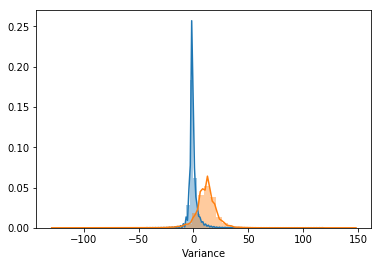

In [388]:
sns.distplot(df01['Residual'])
sns.distplot(df01['Variance'])

In [389]:
df01.to_csv('XGboost.csv')

In [358]:
from xgboost import XGBRegressor

In [363]:
XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [364]:
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=10, min_child_weight=5, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
       silent=True, subsample=1).fit(df01.drop('logDeliveredtime',1),df01['logDeliveredtime'])   

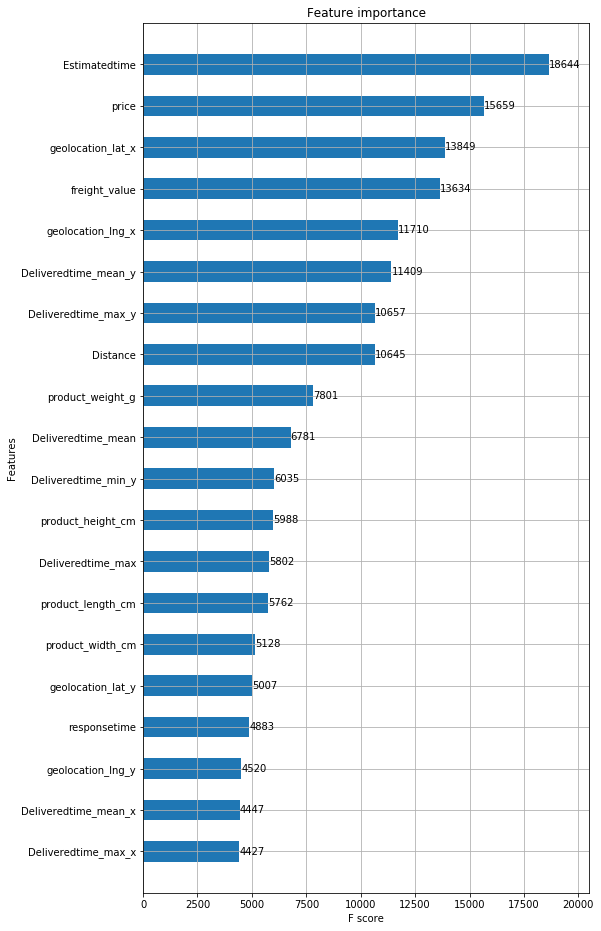

In [350]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, max_num_features=20, height=0.5, ax=ax)

In [367]:
pd.Series(model.feature_importances_,index=df01.drop('logDeliveredtime',1).columns.tolist()).to_csv('feature_imp.csv')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
